<h1>Student Perject </h1>
<h2>CS-EJ3211 - Machine Learning with Python D, 07.09.2020-11.12.2020</h2>


<h1>Vahid Piroozbakht</h1>

<h2> Dataset Name : “Student Performance Data Set”.</h2>

Source : UCI Machine Learning Repository (https://archive.ics.uci.edu/ml/datasets/Student+Performance)

<h2> 1. Introduction:</h2>
This data approach student achievement in secondary education of two Portuguese schools. The data attributes include student grades, demographic, social and school related features) and it was collected by using school reports and questionnaires. Two datasets are provided regarding the performance in two distinct subjects: Mathematics (mat) and Portuguese language (por). In [Cortez and Silva, 2008], the two datasets were modeled under binary/five-level classification and regression tasks. Important note: the target attribute G3 has a strong correlation with attributes G2 and G1. This occurs because G3 is the final year grade (issued at the 3rd period), while G1 and G2 correspond to the 1st and 2nd period grades. It is more difficult to predict G3 without G2 and G1, but such prediction is much more useful (<a href='http://www3.dsi.uminho.pt/pcortez/student.pdf'>see paper source for more details</a>).

In [1]:
# import libraries
import numpy as np
import matplotlib
import pandas as pd
import sklearn
import matplotlib.pyplot as plt 

In [2]:
from sklearn import model_selection
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC 

<h2>2. Problem Formulation: </h2>
In this problem we have some information (features) per each student (data point) and the target of problem is G3 which is final point of one course (Mathematics or Portuguese language).
The first step after reading data from 2 files (student-mat.csv and student-por.csv) and combine them, is doing some process (pre process) on features, that will explain later. after it will start to train the models to be ready fro prediction the student performance.

In [3]:
# Load Dataset
url = "data/"
matDS=pd.read_csv(url+'student-mat.csv',sep=';')
porDS=pd.read_csv(url+'student-por.csv',sep=';')
# Merging two datasets 
dataSet=pd.concat([matDS,porDS])
dataSet.head()

,school,sex,age,address,famsize,Pstatus,Medu,Fedu,Mjob,Fjob,...,famrel,freetime,goout,Dalc,Walc,health,absences,G1,G2,G3
0,GP,F,18,U,GT3,A,4,4,at_home,teacher,...,4,3,4,1,1,3,6,5,6,6
1,GP,F,17,U,GT3,T,1,1,at_home,other,...,5,3,3,1,1,3,4,5,5,6
2,GP,F,15,U,LE3,T,1,1,at_home,other,...,4,3,2,2,3,3,10,7,8,10
3,GP,F,15,U,GT3,T,4,2,health,services,...,3,2,2,1,1,5,2,15,14,15
4,GP,F,16,U,GT3,T,3,3,other,other,...,4,3,2,1,2,5,4,6,10,10


<h3>2.1. Features:</h3>

In [4]:
dataSet.columns

Index(['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu',
       'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime',
       'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery',
       'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc',
       'Walc', 'health', 'absences', 'G1', 'G2', 'G3'],
      dtype='object')

1. school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira)
2. sex - student's sex (binary: 'F' - female or 'M' - male)
3. age - student's age (numeric: from 15 to 22)
4. address - student's home address type (binary: 'U' - urban or 'R' - rural)
5. famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3)
6. Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart)
7. Medu - mother's education (numeric):
<ul>
    <li>0 - none</li>
    <li>1 - primary education (4th grade)</li>
    <li>3 - secondary education </li>
    <li>4 - higher education</li>
</ul>
8. Fedu - father's education (numeric):
<ul>
    <li>0 - none</li>
    <li>1 - primary education (4th grade)</li>
    <li>3 - secondary education </li>
    <li>4 - higher education</li>
</ul>
9. Mjob - mother's job (nominal): 
<ul>
    <li>'teacher'</li>
    <li>'health' care related</li>
    <li>civil 'services' (e.g. administrative or police)</li>
    <li>'at_home'</li>
    <li> 'other'</li>
</ul>
10. Fjob - father's job (nominal): 
<ul>
    <li>'teacher'</li>
    <li>'health' care related</li>
    <li>civil 'services' (e.g. administrative or police)</li>
    <li>'at_home'</li>
    <li> 'other'</li>
</ul>
11. reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other')
12. guardian - student's guardian (nominal: 'mother', 'father' or 'other')
13. traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour)
14. studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
15. failures - number of past class failures (numeric: n if 1<=n<3, else 4)
16. schoolsup - extra educational support (binary: yes or no)
17. famsup - family educational support (binary: yes or no)
18. paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no)
19. activities - extra-curricular activities (binary: yes or no)
20. nursery - attended nursery school (binary: yes or no)
21. higher - wants to take higher education (binary: yes or no)
22. internet - Internet access at home (binary: yes or no)
23. romantic - with a romantic relationship (binary: yes or no)
24. famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent)
25. freetime - free time after school (numeric: from 1 - very low to 5 - very high)
26. goout - going out with friends (numeric: from 1 - very low to 5 - very high)
27. Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high)
28. Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high)
29. health - current health status (numeric: from 1 - very bad to 5 - very good)
30. absences - number of school absences (numeric: from 0 to 93)
31. G1 - first period grade (numeric: from 0 to 20)
32. G2 - second period grade (numeric: from 0 to 20)
#### Output target
33. G3 - final grade (numeric: from 0 to 20)

In [5]:
# remove output target and assin it to y
y=dataSet['G3']
dataSet=dataSet.drop(columns=['G3'])
X=dataSet

Here is one example of data (features) and the target (G3), Final point.

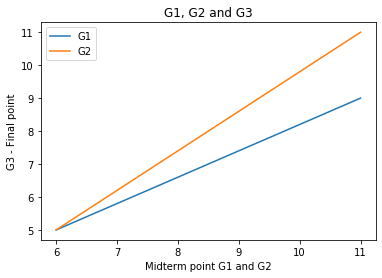

In [6]:
# G1, G2 and G3
plt.plot(y[1],X.G1[1])
plt.plot(y[1],X.G2[1])
plt.title("G1, G2 and G3")
plt.xlabel("Midterm point G1 and G2")
plt.ylabel("G3 - Final point")
plt.legend(['G1','G2'])
plt.show()

<h3>2.2. Pre processing features:</h3>
In this data set we have 3 different type of features, <b>binary</b> that has true of false, of or like sex column, F or M which show Female of Male. <b>numeric</b> that contents number value and <b>nominal</b> which filed by some string values. About numeric data, no need to do any thing but should do data transformation for binary and nominal data. <br><br>
Here the features (columns) are divided by there type (Binary,Number and Nominal). 

In [7]:
nominalFields=['Mjob', 'Fjob','reason','guardian']
intFields=['age', 'Medu', 'Fedu', 'traveltime', 'studytime', 'failures', 'famrel',
       'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2']
binaryFields=['sex','address','school','famsize','Pstatus',   'schoolsup', 'famsup',
       'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic']

<h3>2.3. Transferring binary features:</h3>
Binary features like <i>school</i> or <i>activities</i> have only 2 values, yes/no or GP/MS etc. Should those values change to 0/1 to be usable in models. The <b>feature_transfer_label_encoder</b> function will get the feature name and transfer the values to zero and one.

In [8]:
def feature_transfer_label_encoder(fieldName,dataSet):
    before=dataSet.groupby(fieldName).size()
    leVar = preprocessing.LabelEncoder()
    dataSet[fieldName] =leVar.fit_transform(dataSet[fieldName]) 
    after=dataSet.groupby(fieldName).size()  
    print(fieldName,' :')
    print('    -',before.index[0],'->',after.index[0],', Count: ',after[0])
    print('    -',before.index[1],'->',after.index[1],', Count: ',after[1])

We call the <i>feature_transfer_label_encoder</i> function for all binary features that are in the <i>binaryFields</i> variable. and will see the summary of changes per each binary feature.

In [9]:
# Convert binary data to 0 and 1
for f in binaryFields:
    feature_transfer_label_encoder(f,X)

sex  :
    - F -> 0 , Count:  591
    - M -> 1 , Count:  453
address  :
    - R -> 0 , Count:  285
    - U -> 1 , Count:  759
school  :
    - GP -> 0 , Count:  772
    - MS -> 1 , Count:  272
famsize  :
    - GT3 -> 0 , Count:  738
    - LE3 -> 1 , Count:  306
Pstatus  :
    - A -> 0 , Count:  121
    - T -> 1 , Count:  923
schoolsup  :
    - no -> 0 , Count:  925
    - yes -> 1 , Count:  119
famsup  :
    - no -> 0 , Count:  404
    - yes -> 1 , Count:  640
paid  :
    - no -> 0 , Count:  824
    - yes -> 1 , Count:  220
activities  :
    - no -> 0 , Count:  528
    - yes -> 1 , Count:  516
nursery  :
    - no -> 0 , Count:  209
    - yes -> 1 , Count:  835
higher  :
    - no -> 0 , Count:  89
    - yes -> 1 , Count:  955
internet  :
    - no -> 0 , Count:  217
    - yes -> 1 , Count:  827
romantic  :
    - no -> 0 , Count:  673
    - yes -> 1 , Count:  371


<h3>2.4. Transferring nominal features:</h3>
Nominal features like <i>Mjob</i> or <i>Fjob</i> have some values like 'teacher', 'at_home' etc that are listed above, those values should change to dummy data in separate columns. The <b>feature_transfer_nominal_converter</b> function will get the feature name and transfer the values to dummy columns.

In [10]:
def feature_transfer_nominal_converter(fieldName,dataSet):
    dummy_data=pd.get_dummies(dataSet[fieldName], prefix=fieldName)
    dummy_data=dummy_data.drop(columns=[fieldName+'_other']) # remove other field from dummy data
    res=pd.concat([dataSet, dummy_data], axis=1, sort=False) # concat dummy data with main data set
    res=res.drop(columns=[fieldName]) # remove original field from result
    return res

In [11]:
# Convert nominal data to dummy
for f in nominalFields:
    tr=feature_transfer_nominal_converter(f,X)
    X=tr # fill main data set with converted data

So far our data (features) are ready and we go to define and teach the model

<hr/>

<h2>3. Method:</h2>
In this project we are using different machine learning algorithms to train data and then will test it. for this purpose first we divide the data points to 2 different sub sets(train and test)

In [12]:
# Split-out validation dataset
X_train,X_test,y_train,y_test=model_selection.train_test_split(
    X,y,test_size=0.20,random_state=7)

<h3>3.1. LinearRegression:</h3>

In [13]:
reg = LinearRegression(fit_intercept=True)    # create an object for linear predictors
reg = reg.fit(X_train, y_train)    # find best linear predictor (minimize training error)
pred = reg.predict(X_train)    # compute predictions of best predictors 
tr_reg_error = mean_squared_error(y_train, pred)    # compute training error 
print("training error: ",tr_reg_error)

pred = reg.predict(X_test)    # compute predictions of validation set
val_reg_error = mean_squared_error(y_test, pred)    # compute validation error 
print("validation error: ",val_reg_error)
print("Score: ",reg.score(X_test,y_test))

training error:  2.1266587449414676
validation error:  3.5036622410469334
Score:  0.7724470452520792


<h3>3.2. KNeighborsClassifier: </h3>

In [14]:
# KNN
knn = KNeighborsClassifier()
knn = knn.fit(X_train, y_train)
pred= knn.predict(X_train)
tr_knn_error = mean_squared_error(y_train, pred)    # compute training error 
print("training error: ",tr_knn_error)

pred = knn.predict(X_test)    # compute predictions of validation set
val_knn_error = mean_squared_error(y_test, pred)    # compute validation error 
print("validation error: ",val_knn_error)
print("Score: ",knn.score(X_test,y_test))

training error:  3.0395209580838323
validation error:  4.023923444976076
Score:  0.3444976076555024


<h3>3.3. SVM:</h3>

In [15]:
# SVM
svm=SVC()
svm=svm.fit(X_train, y_train)
pred= svm.predict(X_train)
tr_svm_error = mean_squared_error(y_train, pred)    # compute training error 
print("training error: ",tr_svm_error)

pred = svm.predict(X_test)    # compute predictions of validation set
val_svm_error = mean_squared_error(y_test, pred)    # compute validation error 
print("validation error: ",val_svm_error)
print("Score: ",svm.score(X_test,y_test))

training error:  3.864670658682635
validation error:  5.631578947368421
Score:  0.3492822966507177


<h2>4. Results:</h2>
<table>
    <tr>
        <th>Method</th>
        <th>Accuracy (%)</th>
        <th>Training Error</th>
        <th>Validation Error</th>
    </tr>
    <tr>
        <th>LinearRegression</th>
        <th>77.2</th>
        <th>2.12</th>
        <th>3.5</th>
    </tr>
    <tr>
        <th>KNeighborsClassifier</th>
        <th>34.4</th>
        <th>3.03</th>
        <th>4.02</th>
    </tr>
    <tr>
        <th>SVM</th>
        <th>34.9</th>
        <th>3.86</th>
        <th>5.63</th>
    </tr>
</table>

<h2>5. Conclusion:</h2>
In this study 3 algorithms of ML were used. according to the results, seems using some algorithms only is not enough. the other important point is choosing best algorithm for a particular problem and also preparing the data and feature engineering is other important factor.